<a href="https://colab.research.google.com/github/SamanZargarzadeh/Automatic-Image-Tagging-for-Fashion-E-commerce/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from scipy.io import loadmat
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout, Conv2D, MaxPooling2D 
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [4]:
from google.colab import drive
drive.mount('gdrive')

Mounted at gdrive


In [5]:
X_train= np.load('/content/gdrive/MyDrive/iMaterialist_CNN/train_set_x.npy')[:500]
#X_test= np.load('/content/gdrive/MyDrive/iMaterialist_CNN/test_set_x.npy')
#X_cv= np.load('/content/gdrive/MyDrive/iMaterialist_CNN/cv_set_x.npy')

y_train= np.load('/content/gdrive/MyDrive/iMaterialist_CNN/train_set_y.npy')[:500]
#y_test= np.load('/content/gdrive/MyDrive/iMaterialist_CNN/test_set_y.npy')
#y_cv= np.load('/content/gdrive/MyDrive/iMaterialist_CNN/cv_set_y.npy')

In [6]:
print("train X shape: ", X_train.shape) 
print("train y shape: ", y_train.shape)  
#print("test X shape: ", X_test.shape)   
#print("test y shape: ", y_test.shape)   
#print("CV y shape: ", X_cv.shape) 
#print("CV y shape: ", y_cv.shape) 

train X shape:  (500, 300, 200, 3)
train y shape:  (500,)


In [19]:
model = Sequential([
                    Conv2D(filters=16, kernel_size=(5,5), strides=(1,1), padding='valid', activation = 'relu', input_shape=(300, 200, 3)), 
                    MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
                    Conv2D(filters=32, kernel_size=(5,5), strides=(1,1), padding='valid', activation = 'relu'), 
                    MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
                    Conv2D(filters=64, kernel_size=(5,5), strides=(1,1), padding='valid', activation = 'relu'), 
                    MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
                    Flatten(),
                    Dense(64, activation = 'relu'),
                    BatchNormalization(),
                    Dropout(0.2),
                    Dense(16, activation = 'relu'),
                    BatchNormalization(),
                    Dropout(0.2),
                    Dense(1, activation='sigmoid')
])

In [6]:
model = Sequential([
    Conv2D(filters=16, kernel_size=(5,5), strides=(1,1), padding='valid', activation='relu', input_shape=(300, 200, 3)),
    MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    Conv2D(filters=32, kernel_size=(5,5), strides=(1,1), padding='valid', activation='relu'),
    MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'),
    MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [20]:
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 296, 196, 16)      1216      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 148, 98, 16)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 144, 94, 32)       12832     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 72, 47, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 68, 43, 64)        51264     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 34, 21, 64)      

In [21]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss='binary_crossentropy',
    metrics=[tf.keras.metrics.BinaryAccuracy()]
)

In [23]:
history = model.fit(X_train[..., np.newaxis] , y_train, epochs = 10, batch_size = 50, verbose = 2, validation_split=0.2)


Epoch 1/10
8/8 - 57s - loss: 0.6349 - binary_accuracy: 0.6225 - val_loss: 2.0568 - val_binary_accuracy: 0.6200 - 57s/epoch - 7s/step
Epoch 2/10
8/8 - 56s - loss: 0.6389 - binary_accuracy: 0.6375 - val_loss: 48.2961 - val_binary_accuracy: 0.5900 - 56s/epoch - 7s/step
Epoch 3/10
8/8 - 54s - loss: 0.6148 - binary_accuracy: 0.6650 - val_loss: 1.5403 - val_binary_accuracy: 0.6200 - 54s/epoch - 7s/step
Epoch 4/10
8/8 - 54s - loss: 0.6235 - binary_accuracy: 0.6200 - val_loss: 0.7758 - val_binary_accuracy: 0.6200 - 54s/epoch - 7s/step
Epoch 5/10
8/8 - 57s - loss: 0.6107 - binary_accuracy: 0.6450 - val_loss: 0.7139 - val_binary_accuracy: 0.6100 - 57s/epoch - 7s/step
Epoch 6/10
8/8 - 55s - loss: 0.5743 - binary_accuracy: 0.6750 - val_loss: 0.6849 - val_binary_accuracy: 0.5400 - 55s/epoch - 7s/step
Epoch 7/10
8/8 - 54s - loss: 0.5926 - binary_accuracy: 0.6875 - val_loss: 0.9226 - val_binary_accuracy: 0.6300 - 54s/epoch - 7s/step
Epoch 8/10
8/8 - 55s - loss: 0.5328 - binary_accuracy: 0.7500 - val_

In [24]:
print(history.history.keys())


dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


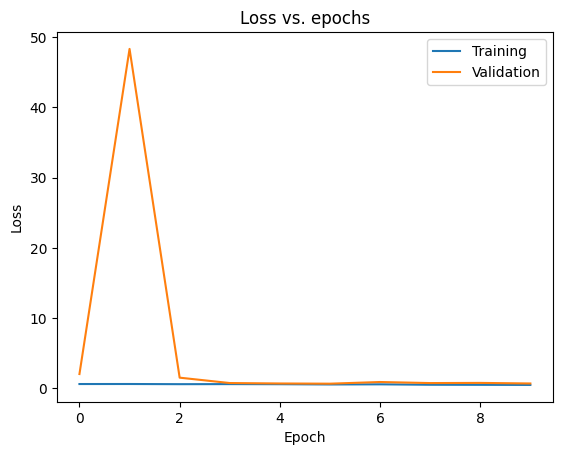

In [25]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()